### Titanic dataset Predition about Survived of passengers abroad the ship

In [148]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [149]:
# Load dataset
titanic_data = pd.read_csv("Titanic-Dataset.csv")

In [150]:
# info of dataset
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [151]:
# summary statistics
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [152]:
# First few rows of the dataset
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Data Cleansing:

In [153]:
# Check missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [154]:
# In Age column fill missing value with the median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Convert 'Age' column to integer type
titanic_data['Age'] = titanic_data['Age'].astype(int)

In [155]:
# Drop rows with missing Embarked values
titanic_data.dropna(subset=['Embarked'], inplace=True)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [156]:
# Check missing values again
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [157]:
# Drop rows with missing Embarked values
titanic_data.dropna(subset=['Embarked'], inplace=True)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


### Data Visualization:

In [158]:
titanic_data['Age'].describe()

count    889.000000
mean      29.299213
std       12.993433
min        0.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

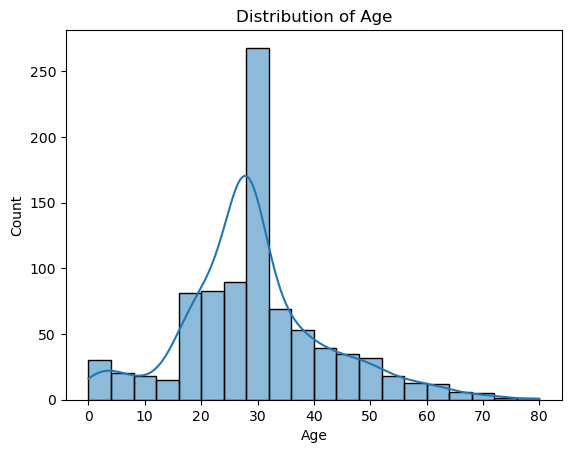

In [159]:
# distribution of age
sns.histplot(titanic_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

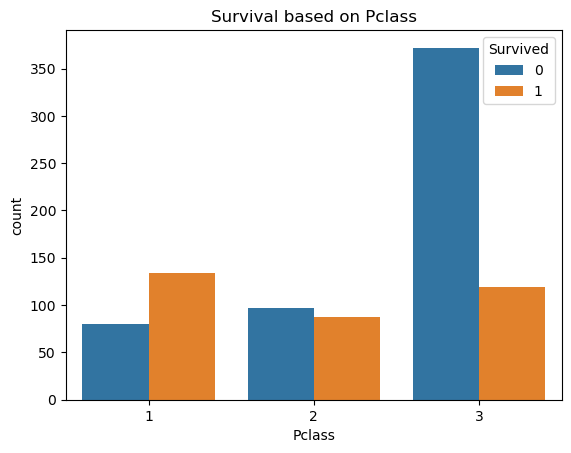

In [160]:
# survival based on Pclass
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival based on Pclass')
plt.show()

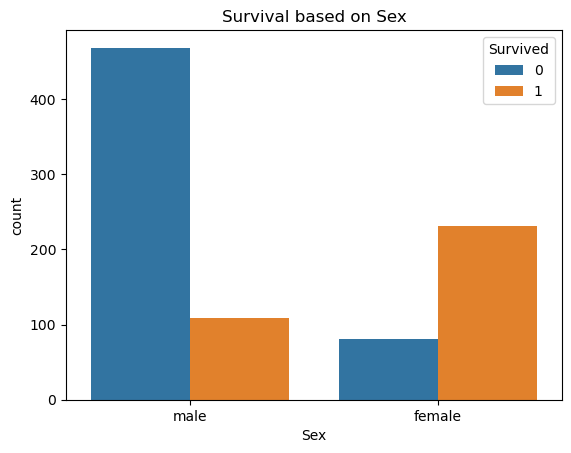

In [161]:
# survival based on Sex
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Survival based on Sex')
plt.show()

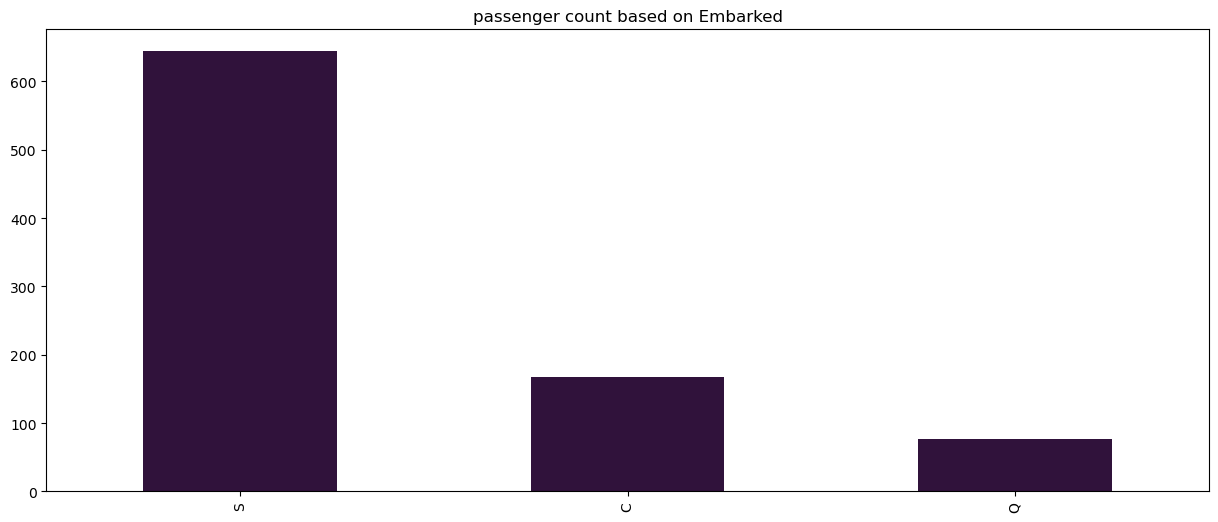

In [162]:
plt.figure(figsize=(15,6))
a=titanic_data['Embarked'].value_counts()
a[a>2].plot(kind='bar', cmap='turbo')
plt.title('passenger count based on Embarked')
plt.show()

getting a new column with no of persons in that specified ticket 

In [163]:
value=titanic_data['Ticket'].value_counts()
titanic_data['persons_in_ticket']=titanic_data['Ticket'].map(value)
value

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [170]:
# creating fare per person using persond per ticket 
titanic_data['fare per person']=titanic_data['Fare']/titanic_data['persons_in_ticket']

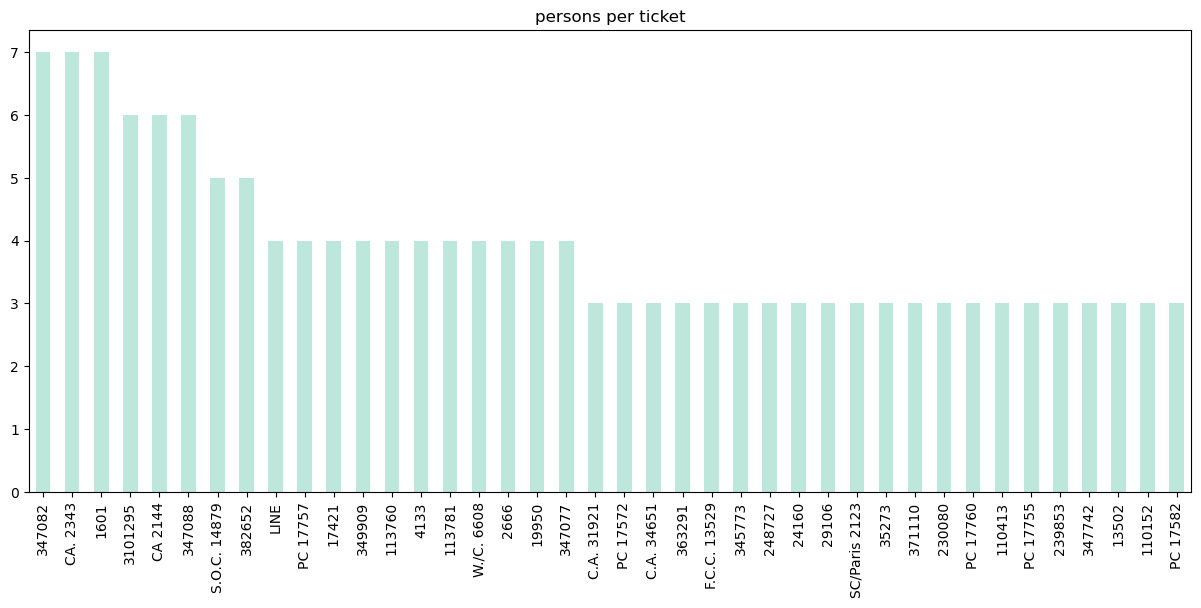

In [171]:
plt.figure(figsize=(15,6))
a=titanic_data['Ticket'].value_counts()
a[a>2].plot(kind='bar', cmap='icefire')
plt.title('persons per ticket')
plt.show()

In [173]:
import re
# getting the title pattern extracted from the name column
title_pattern = r'(Mr\.|Mrs\.|Miss\.|Master\.|Don\.|Rev\.|Dr\.|Ms\.|Major\.|Col\.|Capt\.| Lady\.|Mme\.|Sir\.|Mlle\.|Jonkheer\.)'

# Extract titles using regular expression and create a new 'Title' column
titanic_data['Title'] = titanic_data['Name'].str.extract(title_pattern, expand=False)

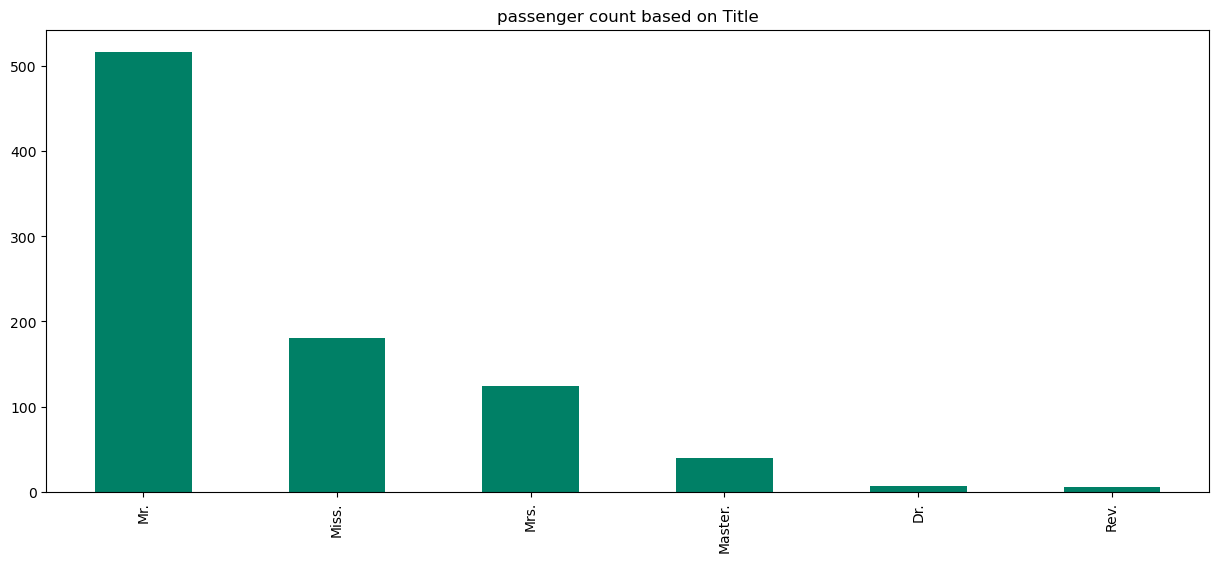

In [174]:
plt.figure(figsize=(15,6))
a=titanic_data['Title'].value_counts()
a[a>2].plot(kind='bar', cmap='summer')
plt.title('passenger count based on Title')
plt.show()

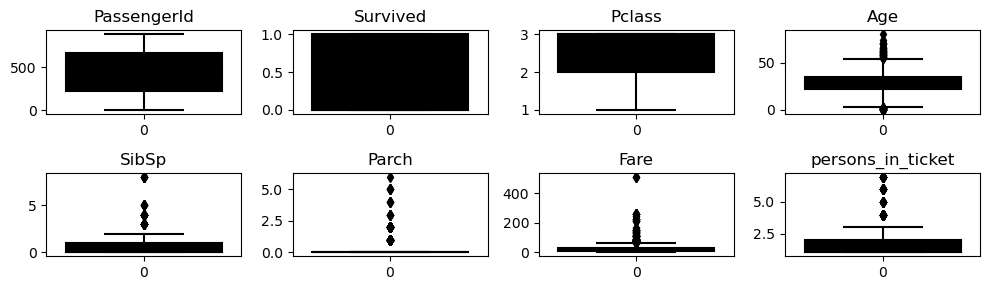

In [185]:
plt.figure(figsize=(10, 3))
re = 1

# Assuming df2_num is a DataFrame containing numeric columns
for i in df2_num.columns:
    if re <= 8:  # Limit the loop to 8 subplots
        plt.subplot(2, 4, re)
        sns.boxplot(titanic_data[i], color='black')
        plt.title(i)
        re += 1

plt.tight_layout()
plt.show()

In [187]:
# creating a new user defined function to apply on persond in ticket 
def travel(x):
    if x==1:
        return 'solo'
    elif x==2:
        return 'bi'
    elif (x==3) | (x==4):
        return 'small family'
    elif (x==5) | (x==6) |(x==7):
        return 'large family'
    
    
titanic_data['travelercategory']=titanic_data['persons_in_ticket'].apply(travel)

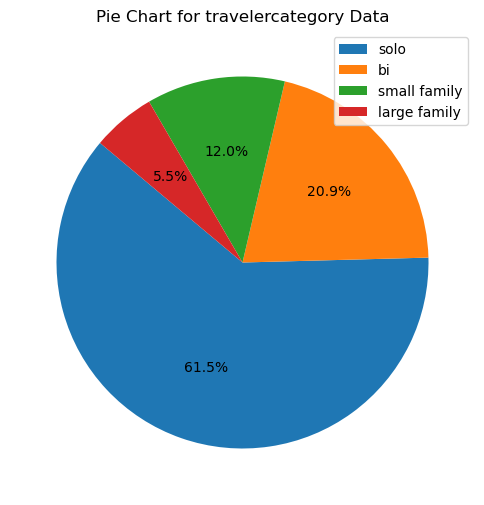

In [188]:
# pie chat to understand the percentage of people in each travel catgeory
b=titanic_data['travelercategory'].value_counts()
plt.figure(figsize=(6,8))
plt.pie(b, autopct='%1.1f%%',
        startangle=140)
plt.legend(b.index)
plt.title('Pie Chart for travelercategory Data')
plt.show()

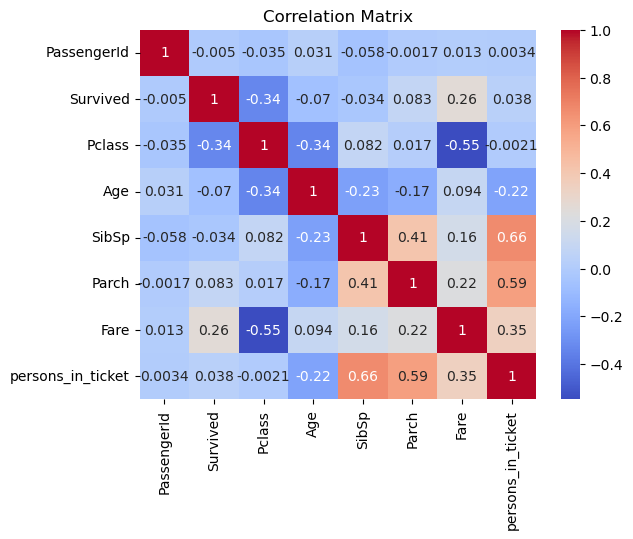

In [164]:
# Visualize correlation matrix
numeric_columns = titanic_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Modeling:

In [165]:
# Select features and target variable
X = titanic_data[['Fare' , 'Parch']]
y = titanic_data['Survived']

# Convert categorical variables to numerical 
X = pd.get_dummies(X)

# Split the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
from lightgbm import LGBMClassifier
model = LGBMClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [166]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7303370786516854
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80       109
           1       0.71      0.51      0.59        69

    accuracy                           0.73       178
   macro avg       0.73      0.69      0.70       178
weighted avg       0.73      0.73      0.72       178



### Model Evaluation (Clustering - KMeans):

In [167]:
# Select features for clustering
X_cluster = titanic_data[['Pclass', 'Age', 'Fare']]

# Standardize the features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)


c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with M

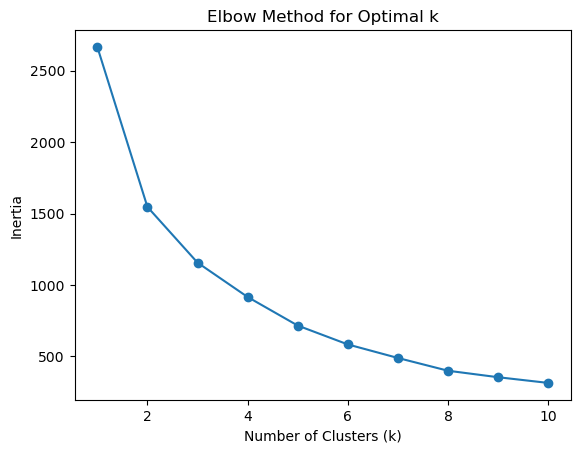

In [168]:
# Plot the Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [169]:
# Based on the elbow method, choose the optimal number of clusters
optimal_k = 3

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
titanic_data['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_cluster_scaled, titanic_data['Cluster'])
print("Silhouette Score:", silhouette_avg)

c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Silhouette Score: 0.4856053526128851


Finished
